In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from dataloader import JPXData
import helper_functions as hf
import matplotlib.pyplot as plt
from autoencoder import autoencoder as ae

/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stock_prices = pd.read_csv("modified_data/autoencoder_data.csv")

In [3]:
train_class = JPXData(data=stock_prices, model="ae")
trainloader = torch.utils.data.DataLoader(train_class, batch_size=1, shuffle=True, num_workers=5)

In [4]:
layers = [69, 50, 35, 20, 15]
net = ae(e_layers=layers, d_layers=layers[::-1]).cuda()

In [5]:
criterion = nn.MSELoss().cuda()
optimizer = optim.SGD(net.parameters(), lr=1e-4, momentum=0.9)

In [6]:
loss_a1 = []
loss_L1 = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    running_loss_l1 = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels, date = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = hf.loss_function(outputs, labels, criterion=lambda x,y: criterion(10*x, 10*y))
        loss_l1 = hf.loss_function(outputs, labels, criterion=nn.L1Loss().cuda())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_loss_l1 += loss_L1.item()
    
        if i % 1000 == 999: # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.5f} L1_loss: {running_loss_l1 / 1000:.5f}')
            loss_a1.append(running_loss /1000)
            loss_L1.append(running_loss_l1/1000)
            running_loss = 0.0
            running_loss_l1 = 0.0
# torch.save(net.state_dict(), f'saved_models/{epoch}.pt') 
        # torch.save(net.state_dict(), f'saved_models/{epoch}.pt')

print('Finished Training')

[1,  1000] loss: 0.8004743241
[2,  1000] loss: 0.7900431686
[3,  1000] loss: 0.7817869242
[4,  1000] loss: 0.7622974153
[5,  1000] loss: 0.7278060471
[6,  1000] loss: 0.6786485879
[7,  1000] loss: 0.6506793940
[8,  1000] loss: 0.6361149130
[9,  1000] loss: 0.6265127752
[10,  1000] loss: 0.6193923427
[11,  1000] loss: 0.6071125016
[12,  1000] loss: 0.5924150317
[13,  1000] loss: 0.5730225213
[14,  1000] loss: 0.5536236719
[15,  1000] loss: 0.5351509403
[16,  1000] loss: 0.5175268455
[17,  1000] loss: 0.5045994700
[18,  1000] loss: 0.4955922507
[19,  1000] loss: 0.4875327421
[20,  1000] loss: 0.4817543047
[21,  1000] loss: 0.4749791518
[22,  1000] loss: 0.4687221346
[23,  1000] loss: 0.4644963779
[24,  1000] loss: 0.4605108163
[25,  1000] loss: 0.4572446980
[26,  1000] loss: 0.4538386605
[27,  1000] loss: 0.4496513450
[28,  1000] loss: 0.4453771473
[29,  1000] loss: 0.4433344268
[30,  1000] loss: 0.4408659311
[31,  1000] loss: 0.4367956037
[32,  1000] loss: 0.4354385815
[33,  1000] loss:

In [7]:
savednet.save_state("autoencoder_saved/ae1.pt")

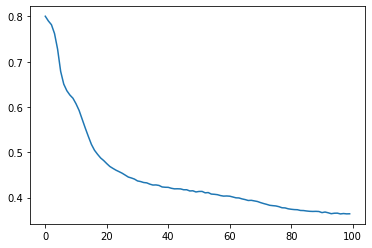

In [8]:
final_loss = np.array(loss_a1)
plt.plot(final_loss)
plt.show()